# Data Exploring

Data Exploration or Exploratory Data Analysis(EDA) aims that 
- detection of the patterns in the dataset depending on the univariate, bivariate and multivariate features.
- determine which feature has bigger impact on the target feature or on the result, solution.
- determine how correlated the features with each others.
- recognize and reduce the errors in the data.

EDA can be proceduralized as follows;
1. <a href='#univariate_analysis_section'><b>Univariate Analysis</b></a><br>
    1.1 <a href='#central_tendency_univariate_analysis_section'><b>Univariate Central Tendency Analysis</b></a><br>
    1.2 <a href='#variability_univariate_analysis_section'><b>Univariate Measure Of Variability Analysis</b></a><br>
    1.3 <a href='#distribution_univariate_analysis_section'><b>Univariate Frequency Distribution Analysis</b></a><br><br>
    
2. <a href='#bivariate_analysis_section'><b>Bivariate Analysis</b></a><br>
    2.1 <a href='#num_num_bivariate_analysis_section'><b>(Numeric - Numeric) Bivariate Analysis</b></a><br>
    2.2 <a href='#num_cat_bivariate_analysis_section'><b>(Numeric - Categorical) Bivariate Analysis</b></a><br>
    2.3 <a href='#cat_cat_bivariate_analysis_section'><b>(Categorical - Categorical) Bivariate Analysis</b></a><br><br>
    
3. <a href='#multivariate_analysis_section'><b>Multivariate Analysis</b></a><br><br>

---

## Data Read

In [2]:
# Import necessary libraries for data obtaining
import pandas as pd

In [3]:
cleaned_data = pd.read_csv('Google_Stock_Price_Dataset.csv')

In [4]:
cleaned_data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


---

<a id='univariate_analysis_section'></a>
## 1. Univariate Analysis

In this section, each feature in the dataset is explored one by one without considering any correlation between these features **by using descriptive statistics**.

<a id='central_tendency_univariate_analysis_section'></a>
### 1.1 Univariate Central Tendency Analysis

As it can be understood from the name of this subsection, methods used in here are used to describe the center or average of the feature.<br>

[Methods Used In This Subsection: **Mean, Mode, Median**]<br>
**Mean** ---> It is used to obtain average value of the column.<br>
**Mode** ---> It is used to obtain most frequently occurring data in the column.<br>
**Median** ---> It is used to obtain the data in central point of the column.

In [5]:
# Means of the numerical features are found
mean = cleaned_data.mean(numeric_only=True)
mean = pd.DataFrame(data={'Mean':mean}).transpose()
mean

,Open,High,Low,Close,Adj_Close,Volume
Mean,41.440372,41.879754,41.019037,41.45733,41.45733,1.189553e+08


In [9]:
# Modes of the each features are found
mode = cleaned_data.iloc[:,1:6].mode().rename(index={0:'Mode'})
mode

,Open,High,Low,Close,Adj_Close
Mode,14.719826,9.713591,11.917829,14.445853,14.445853
1,49.000000,10.112097,12.702388,14.520573,14.520573
2,NaN,11.780843,12.926548,15.354946,15.354946
3,NaN,12.079722,14.396040,NaN,NaN
4,NaN,12.627668,NaN,NaN,NaN
5,NaN,12.677482,NaN,NaN,NaN
6,NaN,12.951455,NaN,NaN,NaN
7,NaN,13.121318,NaN,NaN,NaN
8,NaN,14.445853,NaN,NaN,NaN
9,NaN,15.541746,NaN,NaN,NaN


In [10]:
# Medians of the numerical features are found
median = cleaned_data.median(numeric_only=True)
median = pd.DataFrame(data={'Median':median}).transpose()
median

,Open,High,Low,Close,Adj_Close,Volume
Median,26.49451,26.721262,26.284835,26.528841,26.528841,61738221.0


<a id='variability_univariate_analysis_section'></a>
### 1.2 Univariate Measure Of Variability Analysis

Aim of this subsection is to understand how the data points are spread out the dataset.<br><br>

[Methods Used In This Subsection: **Range**, **Inter Quartile Range(IQR)**, **Skewness**, **Kurtosis**, **Standard Deviation**, **Variance**]<br><br>
**Range** ---> It is used to understand between what points the data oscillates, or spread out.<br><br>
**Inter Quartile Range(IQR)** ---> It is difference of third quartile(Q3) and first quartile(Q1). And, it express the middle half of the column values. Therefore, it is used to understand values in a column have a normal distribution or have skewed distribution.<br><br>
**Skewness** ---> It is used to understand how the values distributed around the mean,median, mode values.<br>
Skewness = [-0.5,0.5] ======> nearly symmetrical data distribution<br>
Skewness = [-1,-0.5] ======> slightly negative skewed data distribution<br>
Skewness = [0.5, 1] ======> slightly positive skewed data distribution<br>
Skewness < -1 ======> extremely negative skewed data distribution<br>
Skewness > 1 ======> extremly positive skewed data distribution<br><br>
**Kurtosis** ---> It is used to understand how many data are in the tail and how the peakness of the data distribution.<br>
Fisher definition is accepted for the kurtosis criteria. Also, it is default in the Scipy library(scipy.stats.kurtosis)<br>
Kurtosis = 0 ==> normally distributed data (**Mesokurtic**)<br>
Kurtosis < 0 ==> thin tailed & flatter distributed data (**Platykurtic**)<br>
Kurtosis > 0 ==> thick tailed & peaked distributed data (**Leptokurtic**)<br><br>
**Standard Deviation** ---> It explains that how far each data values apart from the mean data value on average. Therefore, it is used to understand how the feature values variates around the mean in the column.<br><br>
**Variance** ---> It is squared standard deviation and it explains the degree of spread for a feature in the column.

---

In [11]:
# Import necessary libraries in this subsection
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr, skew, kurtosis

In [12]:
# All column names in the dataset
cleaned_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

---

Open ATTRIBUTE 
Min-Max Range: [2.470490, 151.863495]
Inter Quartile Range(Q3-Q1): 44.508832
Skeweness: 1.276666
Kurtosis: 0.536787
Standard Deviation: 38.555994
Variance: 1486.564681

High ATTRIBUTE 
Min-Max Range: [2.534002, 152.100006]
Inter Quartile Range(Q3-Q1): 45.031670
Skeweness: 1.275387
Kurtosis: 0.522549
Standard Deviation: 38.996463
Variance: 1520.724125

Low ATTRIBUTE 
Min-Max Range: [2.390042, 149.887497]
Inter Quartile Range(Q3-Q1): 44.203833
Skeweness: 1.275490
Kurtosis: 0.536640
Standard Deviation: 38.158602
Variance: 1456.078881

Close ATTRIBUTE 
Min-Max Range: [2.490913, 150.709000]
Inter Quartile Range(Q3-Q1): 44.746912
Skeweness: 1.274796
Kurtosis: 0.527383
Standard Deviation: 38.582806
Variance: 1488.632914

Adj_Close ATTRIBUTE 
Min-Max Range: [2.490913, 150.709000]
Inter Quartile Range(Q3-Q1): 44.746912
Skeweness: 1.274796
Kurtosis: 0.527383
Standard Deviation: 38.582806
Variance: 1488.632914

Volume ATTRIBUTE 
Min-Max Range: [158434.000000, 1650832619.000000]
In

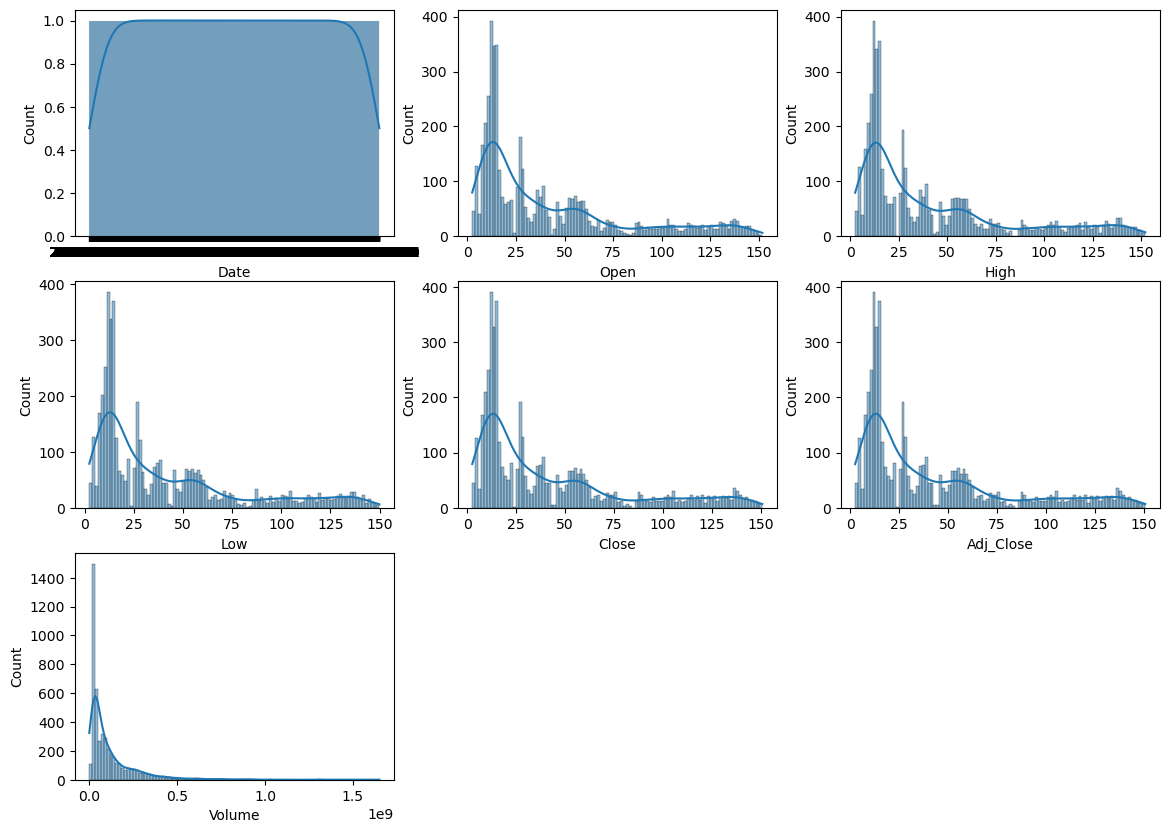

In [15]:
plt.figure(figsize=(14,10))
for i,j in enumerate(cleaned_data.columns):
    if j != 'Date':
        print('%s ATTRIBUTE ' % j)
        # Range
        print('Min-Max Range: [%f, %f]' % (min(cleaned_data[j]), max(cleaned_data[j])))
        # IQR: Inter Quartile Range
        print('Inter Quartile Range(Q3-Q1): %f' % iqr(cleaned_data[j]))
        # Distribution properties
        print('Skeweness: %f' % skew(cleaned_data[j]))
        print('Kurtosis: %f' % kurtosis(cleaned_data[j]))
        print('Standard Deviation: %f' % cleaned_data[j].std())
        print('Variance: %f\n' % cleaned_data[j].var())
              
    plt.subplot(3,3,i+1)
    sns.histplot(cleaned_data[j], kde=True, bins=100)

As it can be seen from the distribution plots, there is no feature that has Gaussian Distribution. Also, all features has a **Leptokurtic** and **extremely positive skeweness** character.

---

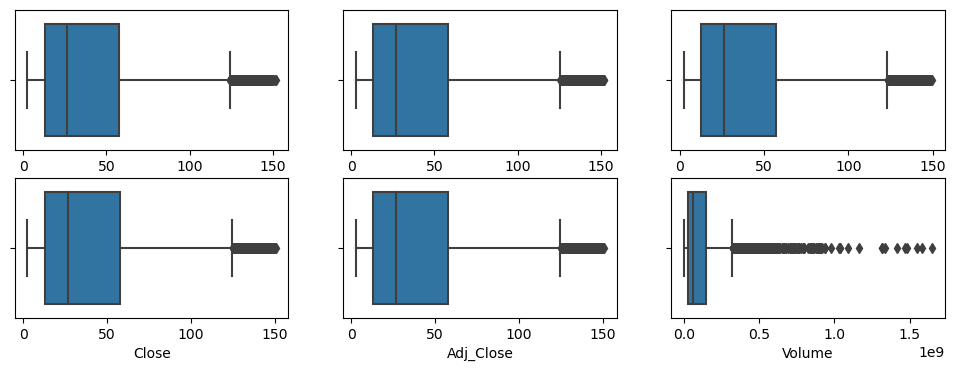

In [17]:
# Box Plots for the features
plt.figure(figsize=(12,4))
for i,j in enumerate(cleaned_data.columns):
    if cleaned_data.columns[i] == 'Date':
        continue
    else:
        plt.subplot(2,3,i)
        sns.boxplot(x = cleaned_data[j])

Acccording to above box plots, Volume has lots of extreme values.

---

<a id='distribution_univariate_analysis_section'></a>
### 1.3 Univariate Frequency Distribution Analysis

Aim of this subsection is getting insights from the occurance amount of a column values(frequency distribution). And, there is no pre-determined proper statistical, mathematical way. Thus, pie chart, histogram plot etc. can be used.

In [18]:
# There is no categorical feature. Thus, frequency distribution is skipped.

---

<a id='bivariate_analysis_section'></a>
## 2. Bivariate Analysis

In this section, features are explored by pairs. There might be both categorical and numeric data in the dataset. Thus, every numerical and categorical pair combinations are explored.

In [19]:
from scipy.stats import pearsonr

<a id='num_num_bivariate_analysis_section'></a>
### 2.1 (Numeric - Numeric) Bivariate Analysis

! Correlation exists between numerical values and, Correlation Matrix is explored in this section as Heatmap Plot.<br><br>
**[Used Methods & Plots: Heatmap Plot, Pearson Correlation Coefficient(r) and p-value, Scatter Plot]**<br><br>
**Heatmap Plot** ---> It is used to represent all variables' correlations with each others as a graphical method.<br><br>
**Pearson Correlation Coefficient(r)** ---> It is used to determine linear correlation between two variable.<br>
r = 1    ===> Perfect Positive Correlation<br>
r > 0.5    ===> Positive Strong Correlation<br>
r = (0.3, 0.5]    ===> Positive Moderate Correlation<br>
r = (0, 0.3]    ===> Positive Weak Correlation<br>
r = 0    ===> No Correlation<br>
r = \[-0.3, 0)    ===> Negative Weak Correlation<br>
r = (-0.3, -0.5\]    ===> Negative Moderate Correlation<br>
r = < -0.5 ===> Negative Strong Correlation<br>
r = -1    ===> Perfect Negative Correlation<br><br>
**p-value** ---> It is used to assess the significance of the calculated r value(Pearson Correlation Coefficient).<br>
p-value < 0.05 ===> Correlation is statistically significant<br>
p-value > 0.05 ===> Correlation is **not** statistically significant

---

!!! corr() function calculates the Pearson Correlation Coefficient(r).

Text(0.5, 1.0, 'Correlations Of Features')

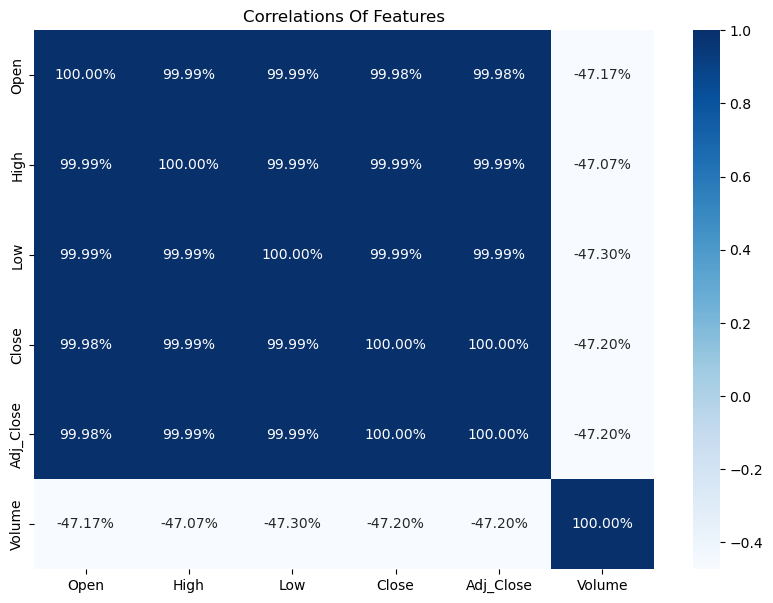

In [25]:
# Plotting Correlation Heatmap of the dataset 
correlation = cleaned_data.corr(numeric_only=True)
plt.figure(figsize=(10, 7))
sns.heatmap(data=correlation, annot=True, cmap='Blues', fmt='.2%')
plt.title('Correlations Of Features')

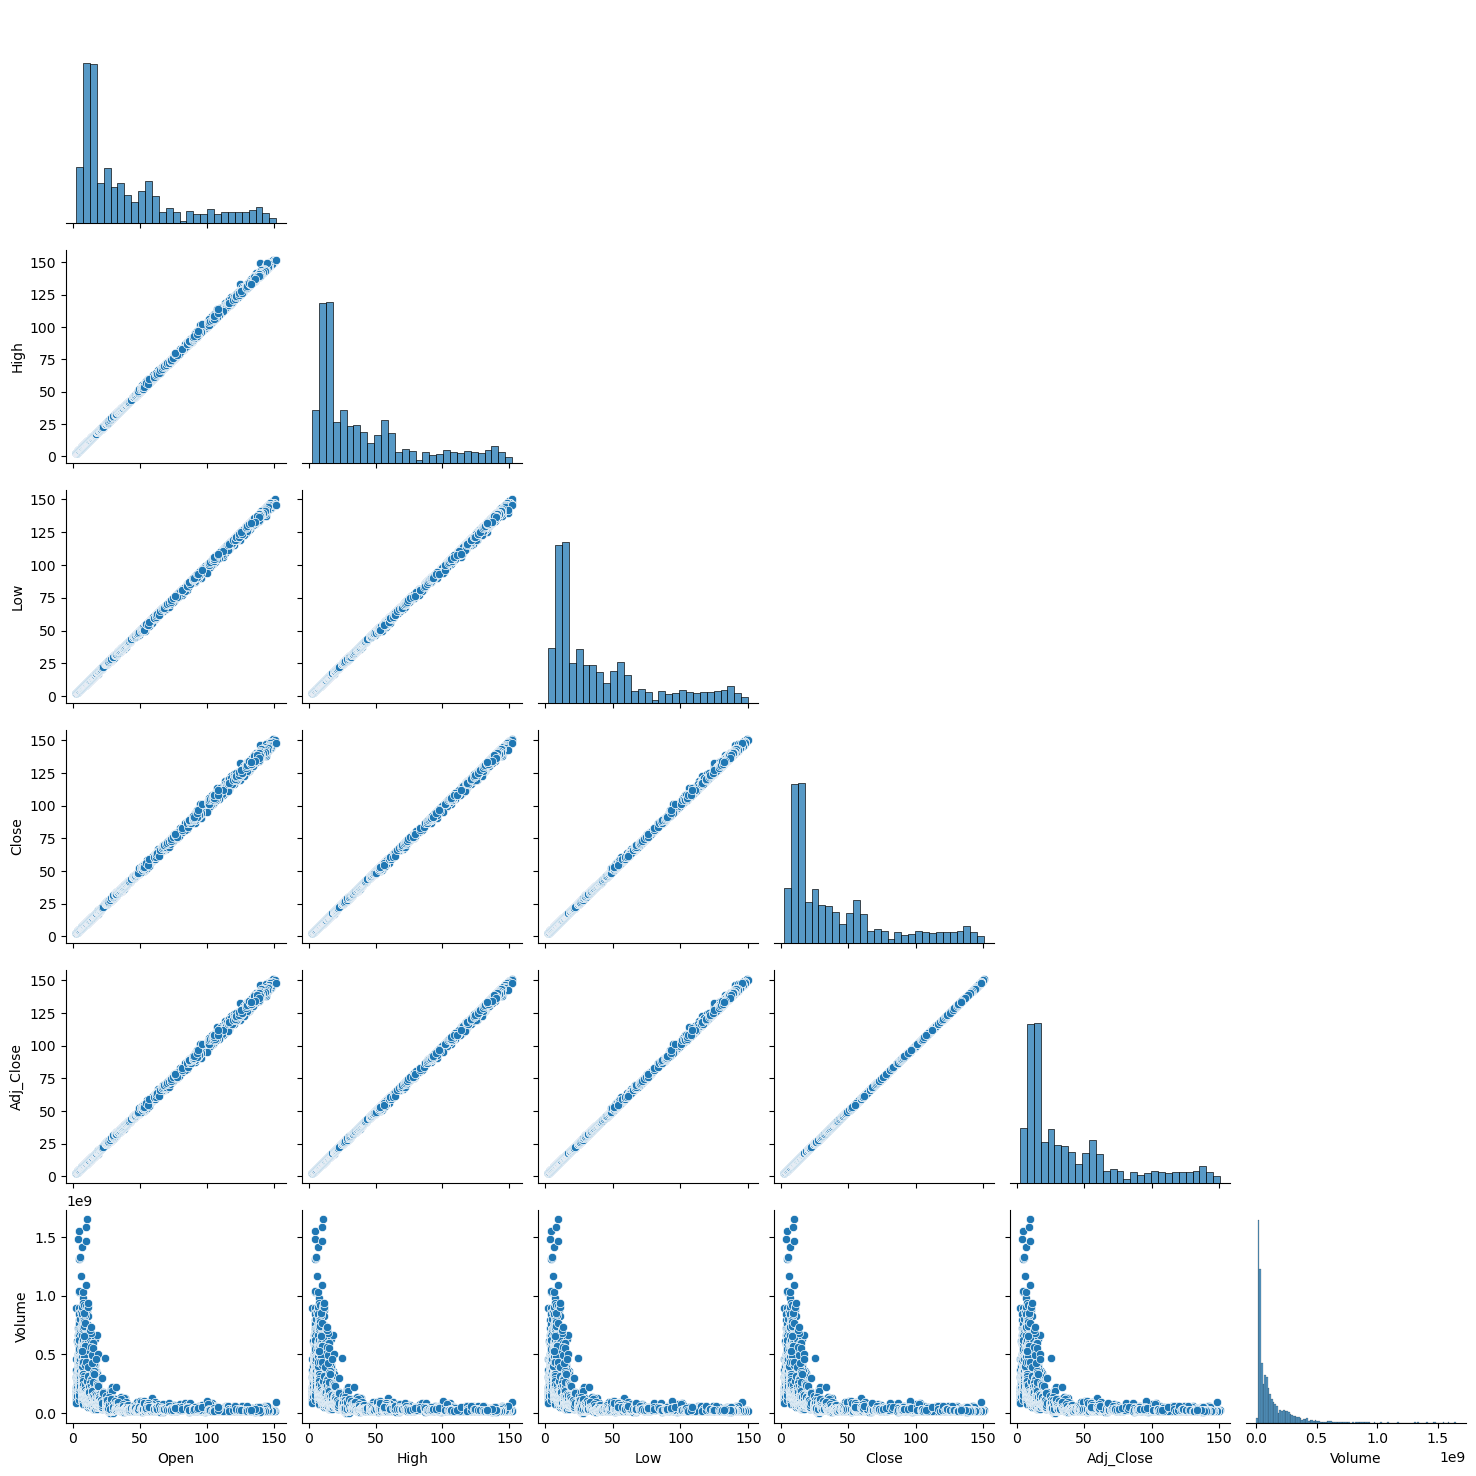

In [29]:
# All features correlation relationship as pair plot
sns.pairplot(cleaned_data, corner=True)

According to findings, there is strong positive correlations between all features except **Volume**.

---

<a id='num_cat_bivariate_analysis_section'></a>
### 2.2 (Numeric - Categorical) Bivariate Analysis

**[Used Plots & Methods: Box Plot, Violin Plot]**

---

In [ ]:
# There is no categorical feature to be compared

---

<a id='cat_cat_bivariate_analysis_section'></a>
### 2.3 (Categorical - Categorical) Bivariate Analysis

In this subsection, only categorical variables are looked for.<br><br>

**[Used Plots & Methods: Chi-Square Test, GroupBy() Function, Box Plot]**<br>
**Chi-Square Test** ---> It is a statistical test that is used to understand if there is any strong relationship between two categorical variables.<br>

In [ ]:
# There is no categorical features to be compared

<a id='multivariate_analysis_section'></a>
## 3. Multivariate Analysis

In this section, effects of more than two features on the another feature is explored.

In [ ]:
# There is no categorical features to observe effects on the multiple features

---